<a href="https://colab.research.google.com/github/castillosebastian/research_tools/blob/master/deep_learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning with MNIST DB

In [ ]:
!pip install 

In [5]:
!pip install segmentation-models

     |████████████████████████████████| 50 kB 6.0 MB/s 


In [1]:
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%load /content/drive/MyDrive/Colab Notebooks/Deep Learning_MNIST_CNN.py
%load /content/drive/MyDrive/Colab Notebooks/AA_utils.py

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

from tensorflow import keras
import segmentation_models as sm

from keras.datasets import mnist

Segmentation Models: using `keras` framework.


In [7]:
EPOCAS= 4
LOTE= 32
alfa= 0.04 # default 0.01
l2alfa= 1e-10
#CLASS_WEIGHT= {0:0.2, 1:0.8} # pesos de cada clase para entrenar
NORMALIZAR= 0

PLOT_CONF_MAT= 1
PLOT_BOUNDARY= 0
PLOT_TRAIN_CURVES= 1
# --------------------------------------------------------------

#%% cARGAR LOS DATOS
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #mnist.load_data()
X_train=X_train / 255 # normalizar 0-1
X_test= X_test / 255
d_in= (28, 28)

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
n_clases= int(np.max(Y_train)+1)
N_train= X_train.shape[0]
N_test= X_test.shape[0]
INPUT_SHAPE= (X_train.shape[1],X_train.shape[2],1)
# reshape data to fit model
X_train = X_train.reshape(X_train.shape[0],INPUT_SHAPE[0],INPUT_SHAPE[1],1)
X_test = X_test.reshape(X_test.shape[0],INPUT_SHAPE[0],INPUT_SHAPE[1],1) 


In [10]:
#%% Build and compile the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape= INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32,input_dim=d_in, activation= 'relu'))
model.add(Flatten())
model.add(Dense(n_clases, activation= 'softmax'))

In [11]:
#compile model using accuracy to measure model performance
model.compile(optimizer=SGD(lr= alfa), loss='sparse_categorical_crossentropy', metrics=['accuracy']) # SGD default lr=0.01
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # rmsprop

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 5, 5, 32)          1056      
                                                                 
 flatten (Flatten)           (None, 800)               0

In [13]:
# info sobre los datos
print("********  Info de los datos *******")    
print("Cant clases: %d" % (max(Y_train)+1)) 
print("Cant patrones Train: %d" % X_train.shape[0])
print("Cant patrones  Test: %d" % X_test.shape[0])
print("Dimensiones del patrón: %d " % X_test.shape[1], X_test.shape[2])
print("***********************************")

********  Info de los datos *******
Cant clases: 10
Cant patrones Train: 60000
Cant patrones  Test: 10000
Dimensiones del patrón: 28  28
***********************************


In [14]:
#%% train the model
history= model.fit(X_train, Y_train, epochs= EPOCAS, batch_size= LOTE, validation_data=(X_test, Y_test)) #, class_weight= CLASS_WEIGHT

Epoch 1/4
1875/1875 [==============================] - 44s 7ms/step - loss: 0.2812 - accuracy: 0.9116 - val_loss: 0.0798 - val_accuracy: 0.9741
Epoch 2/4
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0842 - accuracy: 0.9744 - val_loss: 0.0617 - val_accuracy: 0.9812
Epoch 3/4
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0651 - accuracy: 0.9798 - val_loss: 0.0516 - val_accuracy: 0.9835
Epoch 4/4
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0529 - val_accuracy: 0.9840


In [15]:
#X_train_r= np.reshape(X_train, (N_train, 3072))
#X_test_r= np.reshape(X_test, (N_test, 3072))
X_train_r= X_train
X_test_r= X_test

In [16]:
#%% Scores
print(" *** Score train del modelo: %.2f" % model.evaluate(X_train_r, Y_train)[1])
print(" *** Score test  del modelo: %.2f" % model.evaluate(X_test_r, Y_test)[1])
#%% eficacia del modelo
print("\nTrain")
y_pred_train= model.predict(X_train_r)
print(classification_report(Y_train, np.argmax(y_pred_train, axis=1)))
    
print("\nTest")
y_pred= model.predict(X_test_r)
print(classification_report(Y_test, np.argmax(y_pred, axis=1)))


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0511 - accuracy: 0.9836
 *** Score train del modelo: 0.98
313/313 [==============================] - 2s 5ms/step - loss: 0.0529 - accuracy: 0.9840
 *** Score test  del modelo: 0.98

Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5923
           1       0.99      1.00      0.99      6742
           2       0.99      0.97      0.98      5958
           3       1.00      0.97      0.98      6131
           4       0.98      0.99      0.98      5842
           5       0.98      0.99      0.98      5421
           6       1.00      0.99      0.99      5918
           7       0.98      0.99      0.98      6265
           8       0.96      0.98      0.97      5851
           9       0.99      0.97      0.98      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.

In [32]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
#%% confusion matrix
y_pred = np.argmax(y_pred,axis = 1) 

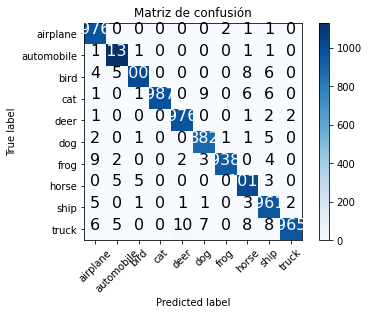

In [33]:
plot_confusion_matrix(Y_test, y_pred, classes= cifar_classes)

In [34]:
#%% Plot train history
def plot_training_curves(history, acc=True):
    # summarize history for accuracy
    if (acc):
        plt.figure()
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.grid()
    # summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()    

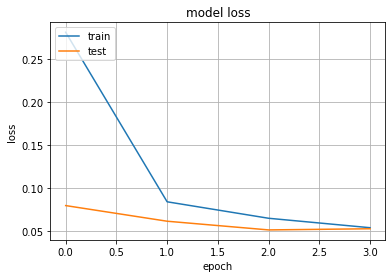

In [36]:
plot_training_curves(history, acc=False) # cambié el parámetro a F

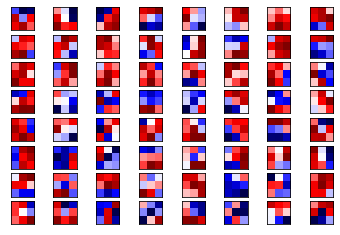

In [30]:
w= model.get_weights()[0]

n_neurons= w.shape[3]
#w_r= np.reshape(w, (28,28,1, n_neurons))
w_r=w
#i= 8
#classi= w_r[:,:,:,i] 
#plt.imshow(classi)
nrow=8
ncolumn= 8
fig, ax = plt.subplots(nrow, ncolumn)#, figsize=(row_size*2.5,col_size*1.5))
index=0
#from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import gaussian
for row in range(0,nrow):
    for col in range(0,ncolumn):
        w_i= w_r[:,:,:,index]
        colorbar_max= max(np.abs( np.max(w_i[:,:,0] )), np.abs( np.min(w_i[:,:,0] )))
        
        ax_im= ax[row][col].imshow(w_i[:,:,0] , cmap='seismic', vmin= -colorbar_max, vmax=colorbar_max)
        
        ax[row][col].get_xaxis().set_visible(False)
        ax[row][col].get_yaxis().set_visible(False)
#        ax[row][col].set_title(cifar_classes[index])
        index += 1

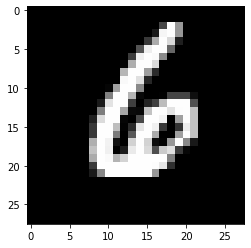

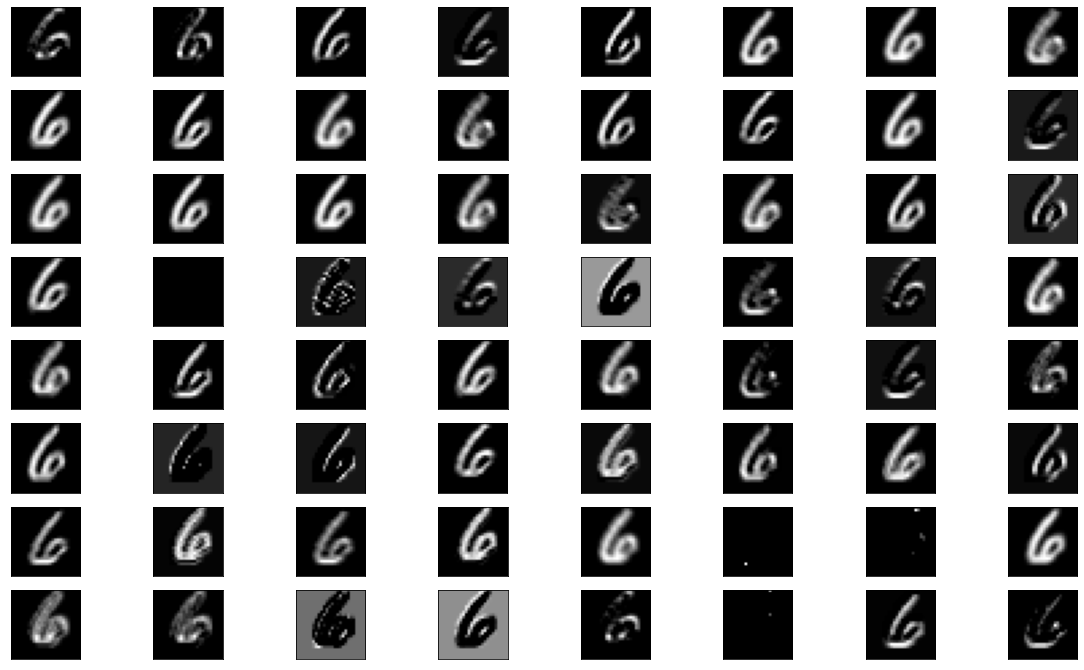

In [31]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
            ax[row][col].get_xaxis().set_visible(False)
            ax[row][col].get_yaxis().set_visible(False)
            
# visualizar activations
from keras.models import Model
i= 155
capa_j= 0
N_img= 28
CHANNELS= 1

#index_rostros= Y_train[:]==1
#rostros= X_train[index_rostros]
plt.figure()
plt.imshow(X_train[i][:,:,0], cmap='gray') # visualizar img original
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[i].reshape(1,N_img,N_img,CHANNELS)) 
display_activation(activations, 8,8 , capa_j) 